Saving Bangalore_1990_2022_BangaloreCity.csv to Bangalore_1990_2022_BangaloreCity (6).csv


<ipython-input-9-6ddec399b7fc>:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[t]
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_p

ARIMA RMSE: 0.8455811729636215
SARIMA RMSE: 2.380231048485054


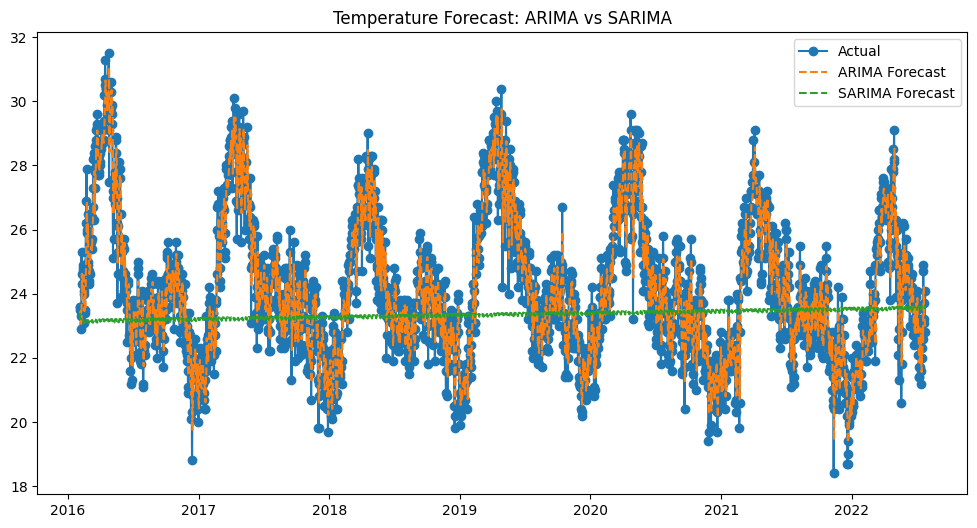

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from google.colab import files

# Upload the file
uploaded = files.upload()  # This will prompt you to upload the file

# Load the data
df = pd.read_csv('Bangalore_1990_2022_BangaloreCity.csv')
df['time'] = pd.to_datetime(df['time'], dayfirst=True, errors='coerce')

# Set the 'time' column as the index
df.set_index('time', inplace=True)

# Assuming the column with average temperature is named 'tavg'
data = df['tavg'].dropna()  # Drop any rows with missing 'tavg'

# Split the data into train and test sets (keeping index)
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# ARIMA model forecast
def arima_forecast(train, test):
    history = [x for x in train]
    predictions = []
    for t in range(len(test)):
        model = ARIMA(history, order=(1,1,1))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    return predictions

# SARIMA model forecast
def sarima_forecast(train, test):
    model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    results = model.fit()
    forecast = results.forecast(steps=len(test))
    return forecast

# Run forecasts
arima_predictions = arima_forecast(train, test)
sarima_predictions = sarima_forecast(train, test)

# Calculate RMSE
arima_rmse = sqrt(mean_squared_error(test, arima_predictions))
sarima_rmse = sqrt(mean_squared_error(test, sarima_predictions))

print(f'ARIMA RMSE: {arima_rmse}')
print(f'SARIMA RMSE: {sarima_rmse}')

# Plot results
plt.figure(figsize=(12,6))
plt.plot(test.index, test, label='Actual', marker='o')
plt.plot(test.index, arima_predictions, label='ARIMA Forecast', linestyle='--')
plt.plot(test.index, sarima_predictions, label='SARIMA Forecast', linestyle='--')
plt.legend()
plt.title('Temperature Forecast: ARIMA vs SARIMA')
plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.8 MB/s eta 0:00:00


Saving Bangalore_1990_2022_BangaloreCity.csv to Bangalore_1990_2022_BangaloreCity.csv
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-765.606, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2019.026, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1498.618, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-763.474, Time=0.26 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.45 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1040.833, Time=0.22 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-761.688, Time=0.56 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-884.287, Time=0.37 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-861.067, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-872.294, Time=0.18 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-888.535, Time=2.35 sec
 ARIMA(2,0,0)(0,0,0)[0] inte

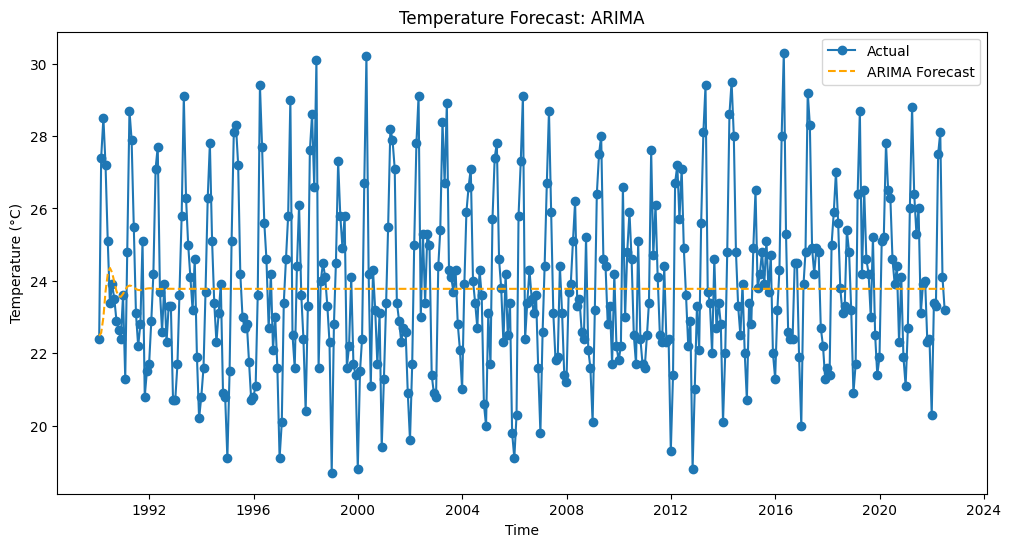

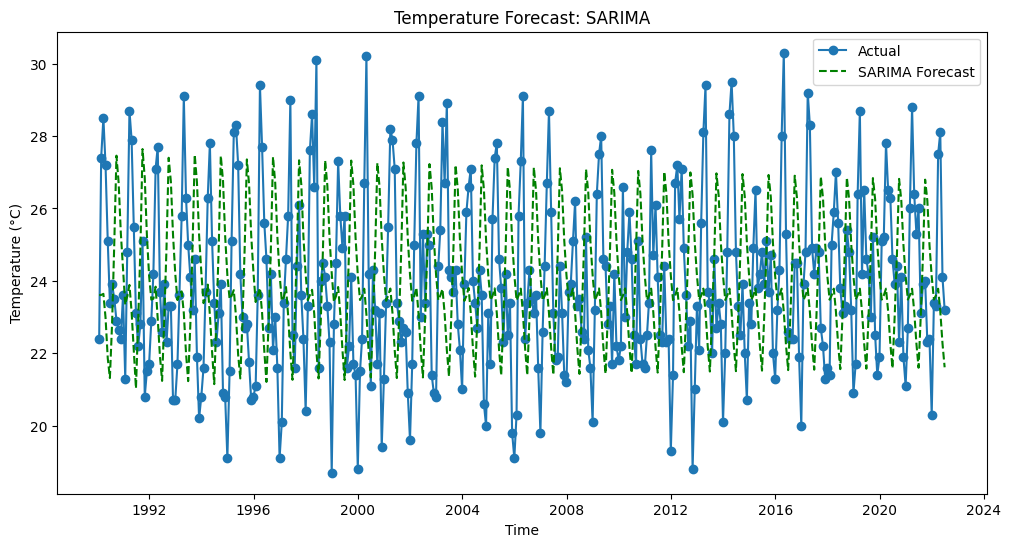

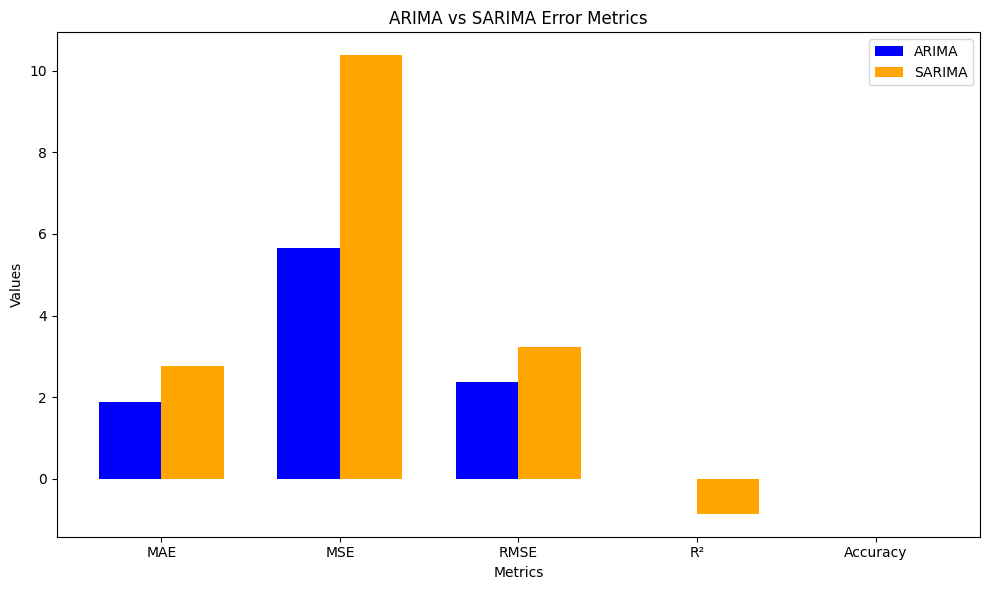

In [ ]:
# @title  {"display-mode":"code"}
# Install required libraries
!pip install pmdarima

import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from google.colab import files

# Upload the file
uploaded = files.upload()

# Load the data
df = pd.read_csv('Bangalore_1990_2022_BangaloreCity.csv')
df['time'] = pd.to_datetime(df['time'], dayfirst=True, errors='coerce')

# Set the 'time' column as the index
df.set_index('time', inplace=True)

# Assuming the column with average temperature is named 'tavg'
data = df['tavg'].dropna()  # Drop any rows with missing 'tavg'

# Ensure data consistency (optional)
data = data.asfreq('M')  # Assuming monthly data, adjust accordingly
data.interpolate(inplace=True)  # Interpolating missing data if needed

# Log transform to stabilize variance (if data has significant fluctuations)
log_data = np.log1p(data)

# Split the data into train and test sets (Use entire data for prediction)
train_size = int(len(log_data))  # Using the entire dataset
train, test = log_data[:train_size], log_data[train_size:]

# ARIMA model forecast with auto_arima tuning
def arima_forecast_auto(train, test):
    # Automatically select the best ARIMA parameters using auto_arima
    model = auto_arima(train, start_p=1, start_q=1, max_p=5, max_q=5, seasonal=False,
                       stepwise=True, trace=True, error_action='ignore', suppress_warnings=True)
    model_fit = model.fit(train)
    predictions = model.predict(n_periods=len(data))  # Forecast for the entire dataset
    return predictions

# SARIMA model forecast using auto_arima (seasonal=True for SARIMA)
def sarima_forecast_auto(train, test):
    # Automatically select the best SARIMA parameters using auto_arima
    model = auto_arima(train, start_p=1, start_q=1, max_p=5, max_q=5,
                       start_P=1, start_Q=1, max_P=3, max_Q=3, m=12,  # Seasonal period (12 for monthly data)
                       seasonal=True, stepwise=True, trace=True, error_action='ignore',
                       suppress_warnings=True)
    model_fit = model.fit(train)
    forecast = model.predict(n_periods=len(data))  # Forecast for the entire dataset
    return forecast

# Reverse log transformation to original scale
def reverse_log_transform(predictions):
    return np.expm1(predictions)

# Accuracy within ±2°C
def accuracy_within_2c(test, predictions):
    correct = sum(abs(test - predictions) <= 2)
    accuracy = correct / len(test) * 100
    return accuracy

# Metrics calculation function
def calculate_metrics(test, predictions):
    mae = mean_absolute_error(test, predictions)
    mse = mean_squared_error(test, predictions)
    rmse = sqrt(mse)
    r_squared = r2_score(test, predictions)
    accuracy = accuracy_within_2c(test, predictions)
    return mae, mse, rmse, r_squared, accuracy

# Run forecasts for auto ARIMA
arima_predictions_log = arima_forecast_auto(train, test)
arima_predictions = reverse_log_transform(arima_predictions_log)

# Calculate ARIMA metrics
arima_mae, arima_mse, arima_rmse, arima_r2, arima_accuracy = calculate_metrics(data, arima_predictions)

# Run forecasts for auto SARIMA
sarima_predictions_log = sarima_forecast_auto(train, test)
sarima_predictions = reverse_log_transform(sarima_predictions_log)

# Calculate SARIMA metrics
sarima_mae, sarima_mse, sarima_rmse, sarima_r2, sarima_accuracy = calculate_metrics(data, sarima_predictions)

# Print ARIMA results
print("ARIMA Model Performance:")
print(f"MAE: {arima_mae:.2f}")
print(f"MSE: {arima_mse:.2f}")
print(f"RMSE: {arima_rmse:.2f}")
print(f"R-squared (R²): {arima_r2:.2f}")
print(f"Accuracy within ±2°C: {arima_accuracy:.2f}%")

# Print SARIMA results
print("\nSARIMA Model Performance:")
print(f"MAE: {sarima_mae:.2f}")
print(f"MSE: {sarima_mse:.2f}")
print(f"RMSE: {sarima_rmse:.2f}")
print(f"R-squared (R²): {sarima_r2:.2f}")
print(f"Accuracy within ±2°C: {sarima_accuracy:.2f}%")

# Plot ARIMA results separately
plt.figure(figsize=(12,6))
plt.plot(data, label='Actual', marker='o')
plt.plot(data.index, arima_predictions, label='ARIMA Forecast', linestyle='--', color='orange')
plt.legend()
plt.title('Temperature Forecast: ARIMA')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.show()

# Plot SARIMA results separately
plt.figure(figsize=(12,6))
plt.plot(data, label='Actual', marker='o')
plt.plot(data.index, sarima_predictions, label='SARIMA Forecast', linestyle='--', color='green')
plt.legend()
plt.title('Temperature Forecast: SARIMA')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.show()

# Error Metrics Comparison Plot
metrics = ['MAE', 'MSE', 'RMSE', 'R²', 'Accuracy']
arima_values = [arima_mae, arima_mse, arima_rmse, arima_r2, arima_accuracy]
sarima_values = [sarima_mae, sarima_mse, sarima_rmse, sarima_r2, sarima_accuracy]

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(metrics))

# ARIMA bar
plt.bar(index, arima_values, bar_width, label='ARIMA', color='blue')

# SARIMA bar
plt.bar(index + bar_width, sarima_values, bar_width, label='SARIMA', color='orange')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('ARIMA vs SARIMA Error Metrics')
plt.xticks(index + bar_width / 2, metrics)
plt.legend()
plt.tight_layout()
plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.0 MB/s eta 0:00:00


Saving Bangalore_1990_2022_BangaloreCity.csv to Bangalore_1990_2022_BangaloreCity.csv
Performing stepwise search to minimize aic


<ipython-input-1-f0d8200f1606>:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = data.asfreq('M')  # Assuming monthly data, adjust accordingly
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/

 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-599.921, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1614.832, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1200.767, Time=0.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-597.834, Time=0.73 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.67 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(0,0,0)[0]             : AIC=836.418, Time=0.34 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-596.144, Time=0.78 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-694.165, Time=0.71 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-675.624, Time=2.57 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-686.158, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-694.453, Time=1.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-703.513, Time=0.48 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-723.084, Time=0.51 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-724.522, Time=0.69 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-724.754, Time=0.43 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-722.287, Time=2.88 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-722.130, Time=3.58 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,0)(0,0,0)[0]             : AIC=inf, Time=0.77 sec

Best model:  ARIMA(5,0,0)(0,0,0)[0] intercept
Total fit time: 16.990 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=-870.944, Time=1.92 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-576.159, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=1.63 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-723.598, Time=0.53 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1614.832, Time=0.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=-728.889, Time=1.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=-653.588, Time=1.48 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(2,0,1)[12] intercept   : AIC=-839.401, Time=4.33 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(1,0,2)[12] intercept   : AIC=-823.187, Time=2.94 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=-694.165, Time=0.22 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,2)[12] intercept   : AIC=-766.729, Time=1.77 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=-842.397, Time=2.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(2,0,2)[12] intercept   : AIC=inf, Time=2.85 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=-806.151, Time=1.82 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=-866.656, Time=2.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(1,0,1)[12] intercept   : AIC=-833.446, Time=1.32 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=-827.389, Time=1.22 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=-794.302, Time=0.81 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(1,0,1)[12] intercept   : AIC=-777.866, Time=1.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=-651.060, Time=0.97 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=-855.163, Time=1.49 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(1,0,1)[12]             : AIC=inf, Time=1.10 sec

Best model:  ARIMA(1,0,1)(1,0,1)[12] intercept
Total fit time: 33.036 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


ARIMA Model Performance:
MAE: 1.78
MSE: 5.00
RMSE: 2.24
R-squared (R²): -0.04
Accuracy within ±2°C: 66.67%

SARIMA Model Performance:
MAE: 1.05
MSE: 1.69
RMSE: 1.30
R-squared (R²): 0.65
Accuracy within ±2°C: 91.03%


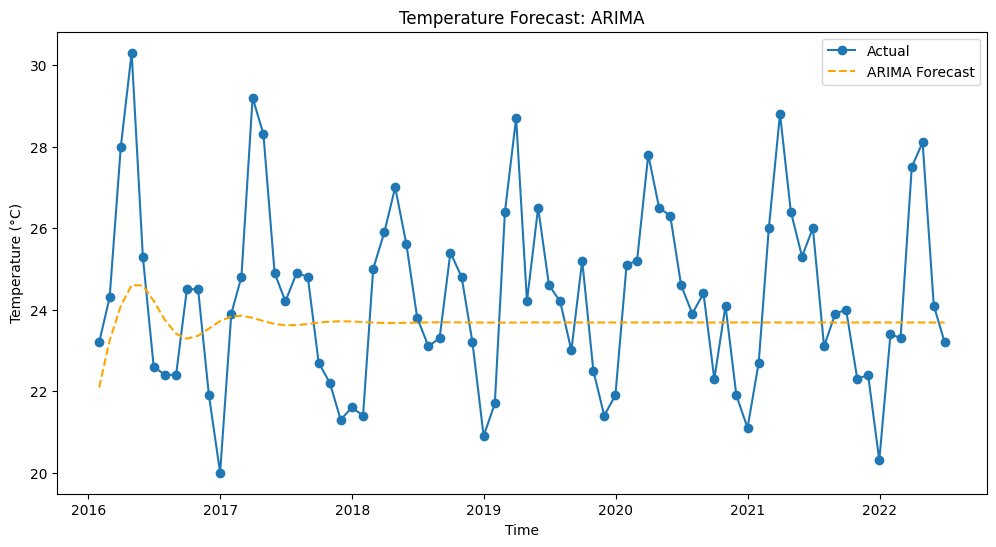

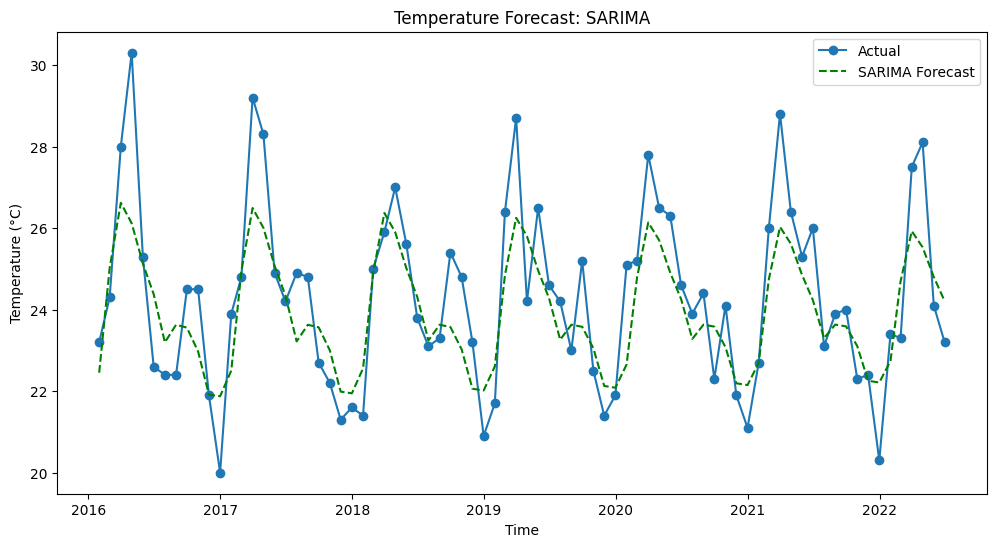

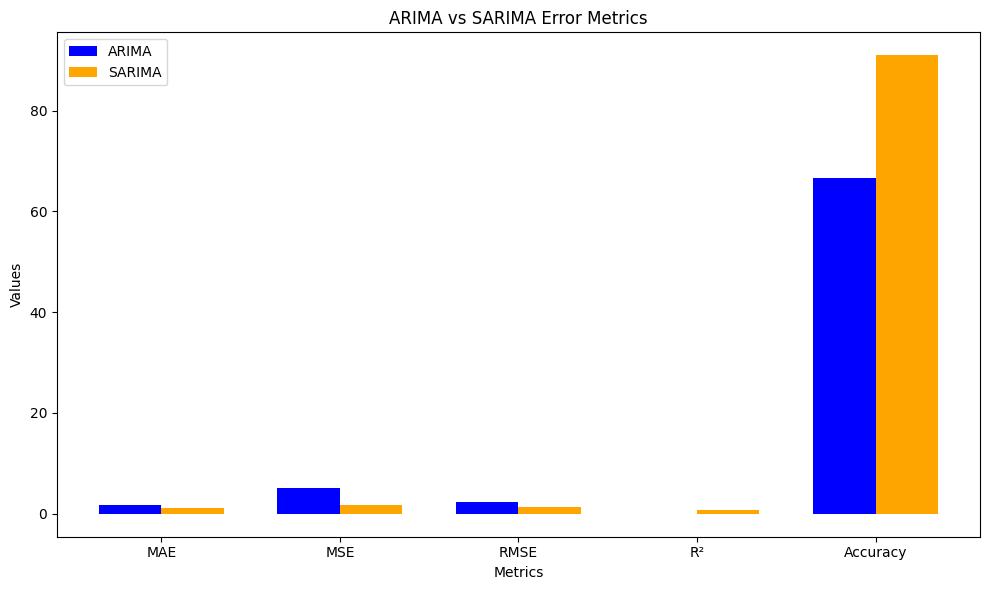

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt
!pip install pmdarima
from pmdarima import auto_arima
from google.colab import files

# Upload the file
uploaded = files.upload()

# Load the data
df = pd.read_csv('Bangalore_1990_2022_BangaloreCity.csv')
df['time'] = pd.to_datetime(df['time'], dayfirst=True, errors='coerce')

# Set the 'time' column as the index
df.set_index('time', inplace=True)

# Assuming the column with average temperature is named 'tavg'
data = df['tavg'].dropna()  # Drop any rows with missing 'tavg'

# Ensure data consistency (optional)
data = data.asfreq('M')  # Assuming monthly data, adjust accordingly
data.interpolate(inplace=True)  # Interpolating missing data if needed

# Log transform to stabilize variance (if data has significant fluctuations)
log_data = np.log1p(data)

# Split the data into train and test sets (keeping index)
train_size = int(len(log_data) * 0.8)
train, test = log_data[:train_size], log_data[train_size:]

# ARIMA model forecast with auto_arima tuning
def arima_forecast_auto(train, test):
    # Automatically select the best ARIMA parameters using auto_arima
    model = auto_arima(train, start_p=1, start_q=1, max_p=5, max_q=5, seasonal=False,
                       stepwise=True, trace=True, error_action='ignore', suppress_warnings=True)
    model_fit = model.fit(train)
    predictions = model.predict(n_periods=len(test))  # Multi-step forecast
    return predictions

# SARIMA model forecast using auto_arima (seasonal=True for SARIMA)
def sarima_forecast_auto(train, test):
    # Automatically select the best SARIMA parameters using auto_arima
    model = auto_arima(train, start_p=1, start_q=1, max_p=5, max_q=5,
                       start_P=1, start_Q=1, max_P=3, max_Q=3, m=12,  # Seasonal period (12 for monthly data)
                       seasonal=True, stepwise=True, trace=True, error_action='ignore',
                       suppress_warnings=True)
    model_fit = model.fit(train)
    forecast = model.predict(n_periods=len(test))  # Multi-step forecast
    return forecast

# Reverse log transformation to original scale
def reverse_log_transform(predictions):
    return np.expm1(predictions)

# Accuracy within ±2°C
def accuracy_within_2c(test, predictions):
    correct = sum(abs(test - predictions) <= 2)
    accuracy = correct / len(test) * 100
    return accuracy

# Metrics calculation function
def calculate_metrics(test, predictions):
    mae = mean_absolute_error(test, predictions)
    mse = mean_squared_error(test, predictions)
    rmse = sqrt(mse)
    r_squared = r2_score(test, predictions)
    accuracy = accuracy_within_2c(test, predictions)
    return mae, mse, rmse, r_squared, accuracy

# Run forecasts for auto ARIMA
arima_predictions_log = arima_forecast_auto(train, test)
arima_predictions = reverse_log_transform(arima_predictions_log)

# Calculate ARIMA metrics
arima_mae, arima_mse, arima_rmse, arima_r2, arima_accuracy = calculate_metrics(data[test.index], arima_predictions)

# Run forecasts for auto SARIMA
sarima_predictions_log = sarima_forecast_auto(train, test)
sarima_predictions = reverse_log_transform(sarima_predictions_log)

# Calculate SARIMA metrics
sarima_mae, sarima_mse, sarima_rmse, sarima_r2, sarima_accuracy = calculate_metrics(data[test.index], sarima_predictions)

# Print ARIMA results
print("ARIMA Model Performance:")
print(f"MAE: {arima_mae:.2f}")
print(f"MSE: {arima_mse:.2f}")
print(f"RMSE: {arima_rmse:.2f}")
print(f"R-squared (R²): {arima_r2:.2f}")
print(f"Accuracy within ±2°C: {arima_accuracy:.2f}%")

# Print SARIMA results
print("\nSARIMA Model Performance:")
print(f"MAE: {sarima_mae:.2f}")
print(f"MSE: {sarima_mse:.2f}")
print(f"RMSE: {sarima_rmse:.2f}")
print(f"R-squared (R²): {sarima_r2:.2f}")
print(f"Accuracy within ±2°C: {sarima_accuracy:.2f}%")

# Plot ARIMA results separately
plt.figure(figsize=(12,6))
plt.plot(data[test.index], label='Actual', marker='o')
plt.plot(test.index, arima_predictions, label='ARIMA Forecast', linestyle='--', color='orange')
plt.legend()
plt.title('Temperature Forecast: ARIMA')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.show()

# Plot SARIMA results separately
plt.figure(figsize=(12,6))
plt.plot(data[test.index], label='Actual', marker='o')
plt.plot(test.index, sarima_predictions, label='SARIMA Forecast', linestyle='--', color='green')
plt.legend()
plt.title('Temperature Forecast: SARIMA')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.show()

# Error Metrics Comparison Plot
metrics = ['MAE', 'MSE', 'RMSE', 'R²', 'Accuracy']
arima_values = [arima_mae, arima_mse, arima_rmse, arima_r2, arima_accuracy]
sarima_values = [sarima_mae, sarima_mse, sarima_rmse, sarima_r2, sarima_accuracy]

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(metrics))

# ARIMA bar
plt.bar(index, arima_values, bar_width, label='ARIMA', color='blue')

# SARIMA bar
plt.bar(index + bar_width, sarima_values, bar_width, label='SARIMA', color='orange')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('ARIMA vs SARIMA Error Metrics')
plt.xticks(index + bar_width / 2, metrics)
plt.legend()
plt.tight_layout()
plt.show()

Saving Bangalore_1990_2022_BangaloreCity.csv to Bangalore_1990_2022_BangaloreCity (1).csv


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

ARIMA Model Performance:
MAE: 1.83
MSE: 5.92
RMSE: 2.43
R-squared (R²): -0.20
Accuracy within ±2°C: 0.00%

SARIMA Model Performance:
MAE: 1.80
MSE: 5.67
RMSE: 2.38
R-squared (R²): -0.15
Accuracy within ±2°C: 0.00%


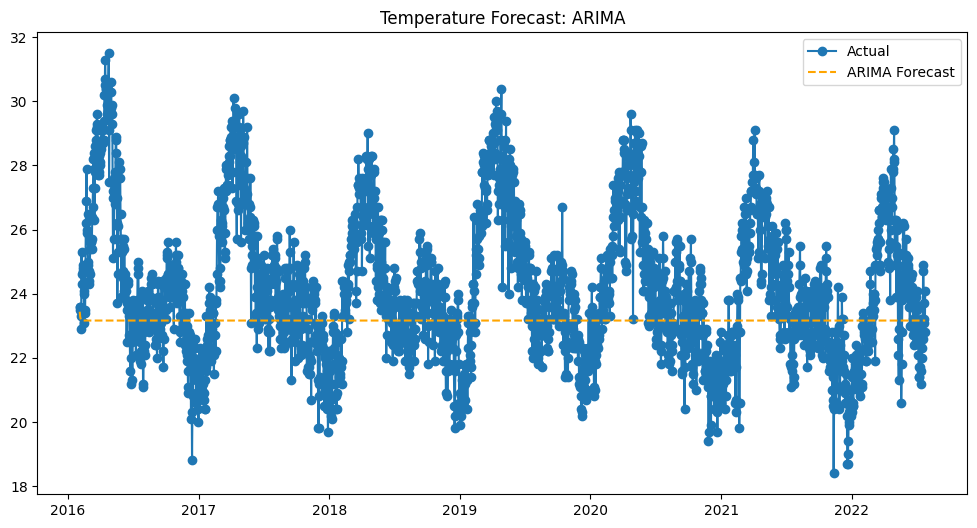

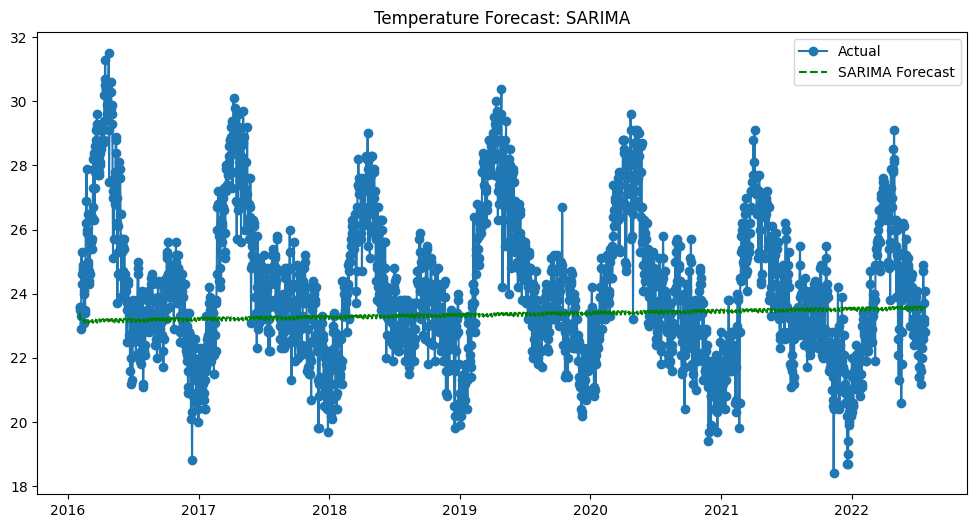

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt
from google.colab import files

# Upload the file
uploaded = files.upload()

# Load the data
df = pd.read_csv('Bangalore_1990_2022_BangaloreCity.csv')
df['time'] = pd.to_datetime(df['time'], dayfirst=True, errors='coerce')

# Set the 'time' column as the index
df.set_index('time', inplace=True)

# Assuming the column with average temperature is named 'tavg'
data = df['tavg'].dropna()  # Drop any rows with missing 'tavg'

# Split the data into train and test sets (keeping index)
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# ARIMA model forecast
def arima_forecast(train, test):
    try:
        model = ARIMA(train, order=(1, 1, 1))  # Lower-order ARIMA model
        model_fit = model.fit()
        predictions = model_fit.forecast(steps=len(test))  # Multi-step forecast
    except KeyboardInterrupt:
        print("Model fitting interrupted.")
        predictions = []
    return predictions


# SARIMA model forecast
def sarima_forecast(train, test):
    model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    results = model.fit()
    forecast = results.forecast(steps=len(test))
    return forecast

# Accuracy within ±2°C
def accuracy_within_2c(test, predictions):
    correct = sum(abs(test - predictions) <= 2)
    accuracy = correct / len(test) * 100
    return accuracy

# Metrics calculation function
def calculate_metrics(test, predictions):
    mae = mean_absolute_error(test, predictions)
    mse = mean_squared_error(test, predictions)
    rmse = sqrt(mse)
    r_squared = r2_score(test, predictions)
    accuracy = accuracy_within_2c(test, predictions)
    return mae, mse, rmse, r_squared, accuracy

# Run forecasts for ARIMA
arima_predictions = arima_forecast(train, test)

# Calculate ARIMA metrics
arima_mae, arima_mse, arima_rmse, arima_r2, arima_accuracy = calculate_metrics(test, arima_predictions)

# Run forecasts for SARIMA
sarima_predictions = sarima_forecast(train, test)

# Calculate SARIMA metrics
sarima_mae, sarima_mse, sarima_rmse, sarima_r2, sarima_accuracy = calculate_metrics(test, sarima_predictions)

# Print results
print("ARIMA Model Performance:")
print(f"MAE: {arima_mae:.2f}")
print(f"MSE: {arima_mse:.2f}")
print(f"RMSE: {arima_rmse:.2f}")
print(f"R-squared (R²): {arima_r2:.2f}")
print(f"Accuracy within ±2°C: {arima_accuracy:.2f}%")

print("\nSARIMA Model Performance:")
print(f"MAE: {sarima_mae:.2f}")
print(f"MSE: {sarima_mse:.2f}")
print(f"RMSE: {sarima_rmse:.2f}")
print(f"R-squared (R²): {sarima_r2:.2f}")
print(f"Accuracy within ±2°C: {sarima_accuracy:.2f}%")

# Plot ARIMA results separately
plt.figure(figsize=(12,6))
plt.plot(test.index, test, label='Actual', marker='o')
plt.plot(test.index, arima_predictions, label='ARIMA Forecast', linestyle='--', color='orange')
plt.legend()
plt.title('Temperature Forecast: ARIMA')
plt.show()

# Plot SARIMA results separately
plt.figure(figsize=(12,6))
plt.plot(test.index, test, label='Actual', marker='o')
plt.plot(test.index, sarima_predictions, label='SARIMA Forecast', linestyle='--', color='green')
plt.legend()
plt.title('Temperature Forecast: SARIMA')
plt.show()
